# Polynomial Regression

Practice on polynomial regression. Used when the data seems to be non-linear in nature.

In [19]:
# import python libraries for machine learning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import sklearn libraries for machine learning
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

## Salary Position Dataset

### Import the dataset, separate into X & y

In [40]:
# import salary postion dataset using pandas
dataset = pd.read_csv('datasets/salary_position.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [41]:
# separate X and y using iloc
X = dataset.iloc[:, 1].values
y = dataset.iloc[:, -1].values

## print X and y to make sure it's correct
print(f'Level: {X}')
print(f'Salary: {y}')

Level: [ 1  2  3  4  5  6  7  8  9 10]
Salary: [  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


### Build & train on a linear regression model (for baseline)

Level 6.5 Salary: [330378.78787879]


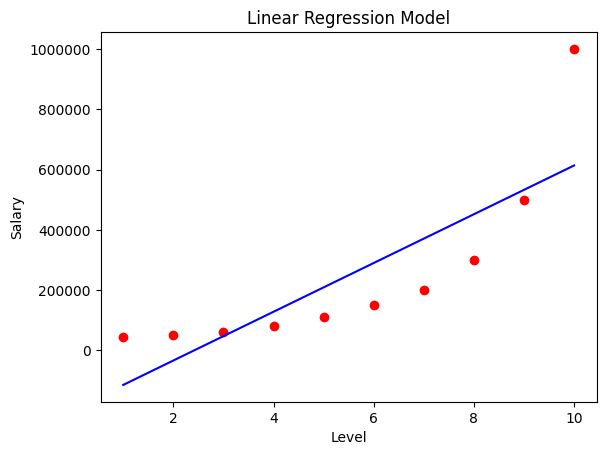

Linear Regression Model Accuracy: 0.6690412331929895


In [42]:
# build linear regression model
linear_model = LinearRegression()
linear_model.fit(X.reshape(-1, 1), y)

# predict salary for level 6.5
print(f'Level 6.5 Salary: {linear_model.predict([[6.5]])}')

## get y_prediction
y_prediction = linear_model.predict(X.reshape(-1, 1))

# visualize linear regression model
plt.scatter(X, y, color='red')
plt.plot(X, y_prediction, color='blue')
plt.title('Linear Regression Model')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.ticklabel_format(axis='y', style='plain')
plt.show()

# measure linear regression model accuracy
r2_score = linear_model.score(X.reshape(-1, 1), y)
print(f'Linear Regression Model Accuracy: {r2_score}')


### Build & train on polynomial regression model

Polynomial Features: [[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]
Level 6.5 Salary: [158862.45265155]


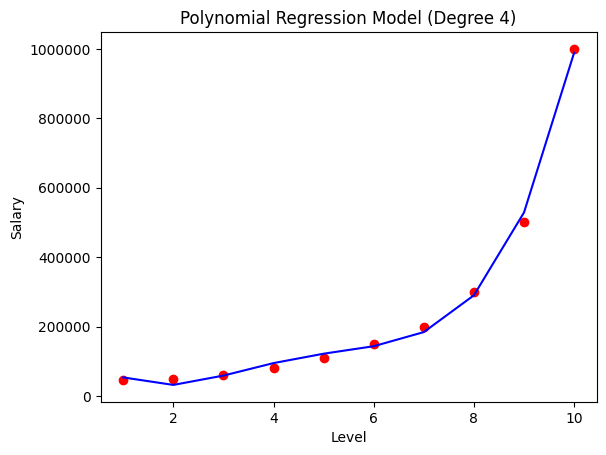

Polynomial Regression Model Accuracy: 0.9973922891706614
Comparison of Linear and Polynomial Regression Model Accuracy
Linear Regression Model Accuracy: 0.6690412331929895
Polynomial Regression Model Accuracy: 0.9973922891706614


In [43]:
## build polynomial regression model
# create polynomial features
poly_features = PolynomialFeatures(degree=4)
X_poly = poly_features.fit_transform(X.reshape(-1, 1))

# print polynomial features
print(f'Polynomial Features: {X_poly}')

# build polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# predict salary for level 6.5
print(f'Level 6.5 Salary: {poly_model.predict(poly_features.fit_transform([[6.5]]))}')

## get y_prediction
y_poly_prediction = poly_model.predict(X_poly)

# visualize polynomial regression model
plt.scatter(X, y, color='red')
plt.plot(X, y_poly_prediction, color='blue')
plt.title('Polynomial Regression Model (Degree 4)')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.ticklabel_format(axis='y', style='plain')
plt.show()

# measure polynomial regression model accuracy
r2_score = poly_model.score(X_poly, y)
print(f'Polynomial Regression Model Accuracy: {r2_score}')

# compare linear and polynomial regression model accuracy
print('Comparison of Linear and Polynomial Regression Model Accuracy')
print(f'Linear Regression Model Accuracy: {linear_model.score(X.reshape(-1, 1), y)}')
print(f'Polynomial Regression Model Accuracy: {poly_model.score(X_poly, y)}')


### Try multiple degrees of polynomial, search for the best & good enough models

Degree 1 Polynomial Regression Model Accuracy: 0.6690412331929895
Degree 2 Polynomial Regression Model Accuracy: 0.9162082221443942
Degree 3 Polynomial Regression Model Accuracy: 0.9812097727913366
Degree 4 Polynomial Regression Model Accuracy: 0.9973922891706614
Degree 5 Polynomial Regression Model Accuracy: 0.9997969027099755
Degree 6 Polynomial Regression Model Accuracy: 0.9999494749253776
Degree 7 Polynomial Regression Model Accuracy: 0.9999770143729169
Degree 8 Polynomial Regression Model Accuracy: 0.9999934972438329
Degree 9 Polynomial Regression Model Accuracy: 0.9999999999999825
Degree 10 Polynomial Regression Model Accuracy: 1.0


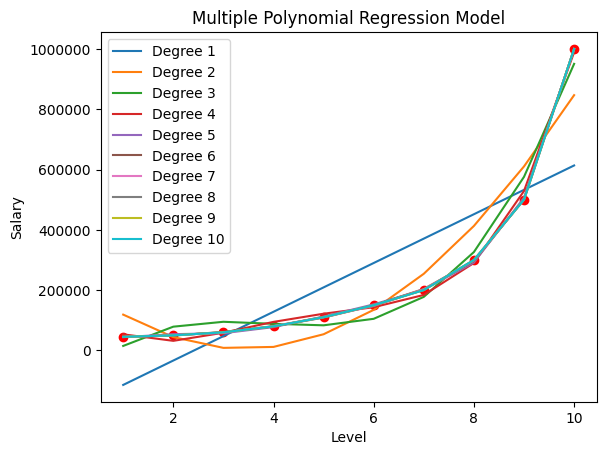

Best Polynomial Regression Model Degree: 10
Best Polynomial Regression Model Accuracy: 1.0


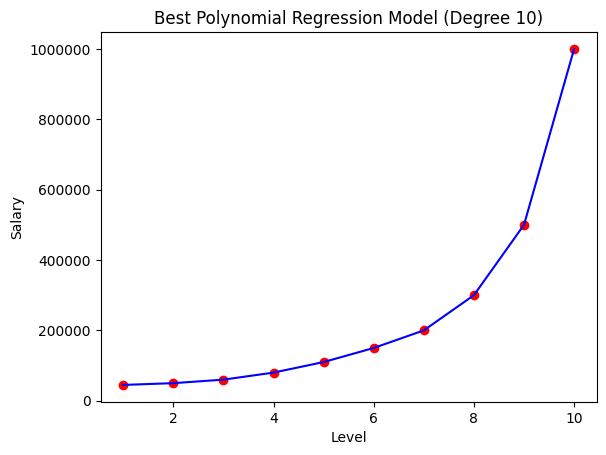

Good Enough Polynomial Regression Model Threshold: 0.99 (99%)
Good Enough Polynomial Regression Model Degree: 4
Good Enough Polynomial Regression Model Accuracy: 0.9973922891706614


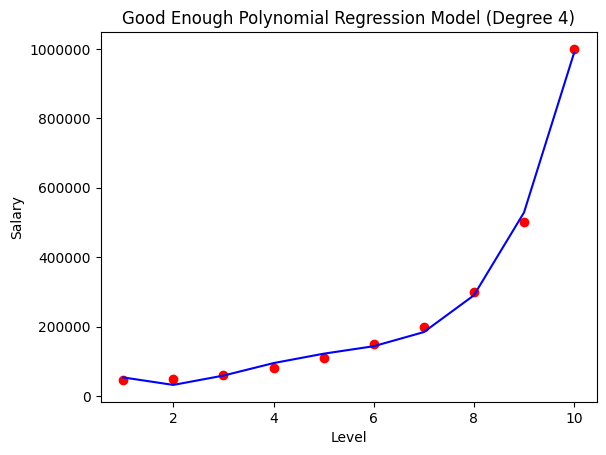

In [44]:
# try multiple polynomial regression model
max_degree = 10
r2_score = np.zeros(max_degree)
y_pred_array = []

for degree in range(1, max_degree + 1):
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X.reshape(-1, 1))
    poly_model = LinearRegression()
    poly_model.fit(X_poly, y)
    r2_score[degree - 1] = poly_model.score(X_poly, y)
    print(f'Degree {degree} Polynomial Regression Model Accuracy: {r2_score[degree - 1]}')
    y_pred_array.append(poly_model.predict(X_poly))

# visualize multiple polynomial regression model in a single plot
plt.scatter(X, y, color='red')
for i in range(0, max_degree):
    plt.plot(X, y_pred_array[i], label=f'Degree {i + 1}')
plt.title('Multiple Polynomial Regression Model')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.ticklabel_format(axis='y', style='plain')
plt.legend()
plt.show()

# print best polynomial regression model accuracy & degree
print(f'Best Polynomial Regression Model Degree: {np.argmax(r2_score) + 1}')
print(f'Best Polynomial Regression Model Accuracy: {np.max(r2_score)}')

# visualize best polynomial regression model
plt.scatter(X, y, color='red')
plt.plot(X, y_pred_array[np.argmax(r2_score)], color='blue')
plt.title(f'Best Polynomial Regression Model (Degree {np.argmax(r2_score) + 1})')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.ticklabel_format(axis='y', style='plain')
plt.show() 

# print good enough polynomial regression model accuracy & degree before diminishing returns, threshold = 0.99
threshold = 0.99
print(f'Good Enough Polynomial Regression Model Threshold: {threshold} (99%)')

indices = np.where(r2_score > threshold)
good_degree = np.min(indices) + 1

print(f'Good Enough Polynomial Regression Model Degree: {good_degree}')
print(f'Good Enough Polynomial Regression Model Accuracy: {r2_score[good_degree - 1]}')

# visualize good enough polynomial regression model
plt.scatter(X, y, color='red')
plt.plot(X, y_pred_array[good_degree - 1], color='blue')
plt.title(f'Good Enough Polynomial Regression Model (Degree {good_degree})')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.ticklabel_format(axis='y', style='plain')
plt.show()


## Advertising Dataset

### Import Dataset, separate into X & y

In [36]:
# import advertising dataset using pandas
ads_data = pd.read_csv('datasets/advertising.csv')
ads_data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [38]:
# separate X and y using iloc
X = ads_data.iloc[:, 1:-1].values
y = ads_data.iloc[:, -1].values

# print X and y to make sure it's correct
print(f'First 5 Data Points of Features: {X[:5, :]}')
print(f'First 5 Data Points of Target: {y[:5]}')

# print feature names
print(f'Feature Names: {ads_data.columns[1:-1]}')

First 5 Data Points of Features: [[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]
 [151.5  41.3  58.5]
 [180.8  10.8  58.4]]
First 5 Data Points of Target: [22.1 10.4  9.3 18.5 12.9]
Feature Names: Index(['TV', 'Radio', 'Newspaper'], dtype='object')
